In [1]:
import pandas as pd

# Load the dataset
data_path = 'Downloads/transformed_data2.xlsx'
data = pd.read_excel(data_path)

# Display the first few rows to understand its structure
data.head()

,DayofMonth,DayOfWeek,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Operating_Airline,OriginAirportID,Origin,Dest,DestState,CRSDepTime,...,cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h),DepCount,Congestion
0,6,4,DL,19790,DL,12953,LGA,DEN,CO,1826,...,0,1,100,9.7,21.1,243,253,15.5,48,65
1,6,4,DL,19790,DL,12953,LGA,FLL,FL,1359,...,0,0,100,19.5,25.6,268,269,34.9,48,62
2,6,4,DL,19790,DL,12478,JFK,FLL,FL,1829,...,0,1,100,9.7,21.1,243,253,15.5,48,62
3,6,4,DL,19790,DL,12953,LGA,MCO,FL,1529,...,0,0,92,16.3,21.0,275,276,33.8,50,70
4,6,4,DL,19790,DL,12478,JFK,MCO,FL,1514,...,0,0,92,16.3,21.0,275,276,33.8,50,70


In [2]:
data.isnull().sum()

DayofMonth                   0
DayOfWeek                    0
Marketing_Airline_Network    0
DOT_ID_Marketing_Airline     0
Operating_Airline            0
OriginAirportID              0
Origin                       0
Dest                         0
DestState                    0
CRSDepTime                   0
DepDelayMinutes              0
DepDel15                     0
DepTimeBlk                   0
AirTime                      0
Distance                     0
ArrCount                     0
CombinedDateTime             0
temperature_2m (°C)          0
relative_humidity_2m (%)     0
dew_point_2m (°C)            0
precipitation (mm)           0
rain (mm)                    0
snowfall (cm)                0
snow_depth (m)               0
weather_code (wmo code)      0
pressure_msl (hPa)           0
surface_pressure (hPa)       0
cloud_cover (%)              0
cloud_cover_low (%)          0
cloud_cover_mid (%)          0
cloud_cover_high (%)         0
wind_speed_10m (km/h)        0
wind_spe

In [3]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


# Selecting the weather-related features and the target variable
features_list = [
    "temperature_2m (°C)", "relative_humidity_2m (%)", "dew_point_2m (°C)",
    "precipitation (mm)", "rain (mm)", "snowfall (cm)", "snow_depth (m)",
    "weather_code (wmo code)", "pressure_msl (hPa)", "surface_pressure (hPa)",
    "cloud_cover (%)", "cloud_cover_low (%)", "cloud_cover_mid (%)",
    "cloud_cover_high (%)", "wind_speed_10m (km/h)", "wind_speed_100m (km/h)",
    "wind_direction_10m (°)", "wind_direction_100m (°)", "wind_gusts_10m (km/h)"
]

# Extracting the specified features and the target variable from the dataset
X_weather = data[features_list]
y_weather = data['DepDelayMinutes']

# Scaling the features
scaler = StandardScaler()
X_weather_scaled = scaler.fit_transform(X_weather)

# Apply LASSO regression with cross-validation to select relevant features
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_weather_scaled, y_weather)

# Extract the coefficients of the LASSO model
lasso_coefficients = pd.Series(lasso_cv.coef_, index=features_list)

# Identifying important features (non-zero coefficients)
important_features = lasso_coefficients[lasso_coefficients != 0].sort_values(key=abs, ascending=False)

important_features

/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5814.789782568812, tolerance: 5106.655750255642
  model = cd_fast.enet_coordinate_descent_gram(
/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7278.809349015355, tolerance: 5106.655750255642
  model = cd_fast.enet_coordinate_descent_gram(
/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9006.960898935795, tolerance: 5106.655750255642
  model = cd_fast.enet_coordinate_descent_gram(
/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

snow_depth (m)              3.637149
surface_pressure (hPa)     -1.971646
weather_code (wmo code)     1.458027
cloud_cover_mid (%)         1.189161
relative_humidity_2m (%)    0.216544
dtype: float64

In [4]:
# List of initial weather-related columns to be removed
weather_columns_to_remove = [
    "temperature_2m (°C)", "relative_humidity_2m (%)", "dew_point_2m (°C)",
    "precipitation (mm)", "rain (mm)", "snowfall (cm)", "snow_depth (m)",
    "weather_code (wmo code)", "pressure_msl (hPa)", "surface_pressure (hPa)",
    "cloud_cover (%)", "cloud_cover_low (%)", "cloud_cover_mid (%)",
    "cloud_cover_high (%)", "wind_speed_10m (km/h)", "wind_speed_100m (km/h)",
    "wind_direction_10m (°)", "wind_direction_100m (°)", "wind_gusts_10m (km/h)"
]

# Identifying the important weather-related features as determined by LASSO
important_weather_features = [
    "snow_depth (m)", "surface_pressure (hPa)", "weather_code (wmo code)",
    "cloud_cover_mid (%)", "relative_humidity_2m (%)"
]

# Remove all initial weather-related columns from the dataset
data_without_weather = data.drop(columns=weather_columns_to_remove, errors='ignore')

# Add back the important weather-related features
df = pd.concat([data_without_weather, data[important_weather_features]], axis=1)

# Now, data_with_important_weather_features contains the modified dataset
print(df.head())

   DayofMonth  DayOfWeek Marketing_Airline_Network  DOT_ID_Marketing_Airline  \
0           6          4                        DL                     19790   
1           6          4                        DL                     19790   
2           6          4                        DL                     19790   
3           6          4                        DL                     19790   
4           6          4                        DL                     19790   

  Operating_Airline   OriginAirportID Origin Dest DestState  CRSDepTime  ...  \
0                 DL            12953    LGA  DEN        CO        1826  ...   
1                 DL            12953    LGA  FLL        FL        1359  ...   
2                 DL            12478    JFK  FLL        FL        1829  ...   
3                 DL            12953    LGA  MCO        FL        1529  ...   
4                 DL            12478    JFK  MCO        FL        1514  ...   

   Distance  ArrCount  CombinedDateTim

In [5]:
df.head()

,DayofMonth,DayOfWeek,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Operating_Airline,OriginAirportID,Origin,Dest,DestState,CRSDepTime,...,Distance,ArrCount,CombinedDateTime,DepCount,Congestion,snow_depth (m),surface_pressure (hPa),weather_code (wmo code),cloud_cover_mid (%),relative_humidity_2m (%)
0,6,4,DL,19790,DL,12953,LGA,DEN,CO,1826,...,1620,17,2022-01-06T18:00,48,65,0.02,1007.7,1,1,54
1,6,4,DL,19790,DL,12953,LGA,FLL,FL,1359,...,1076,14,2022-01-06T13:00,48,62,0.02,1006.8,1,0,38
2,6,4,DL,19790,DL,12478,JFK,FLL,FL,1829,...,1069,14,2022-01-06T18:00,48,62,0.02,1007.7,1,1,54
3,6,4,DL,19790,DL,12953,LGA,MCO,FL,1529,...,950,20,2022-01-06T15:00,50,70,0.02,1006.6,1,0,37
4,6,4,DL,19790,DL,12478,JFK,MCO,FL,1514,...,944,20,2022-01-06T15:00,50,70,0.02,1006.6,1,0,37


In [6]:
df.isnull().sum()

DayofMonth                   0
DayOfWeek                    0
Marketing_Airline_Network    0
DOT_ID_Marketing_Airline     0
Operating_Airline            0
OriginAirportID              0
Origin                       0
Dest                         0
DestState                    0
CRSDepTime                   0
DepDelayMinutes              0
DepDel15                     0
DepTimeBlk                   0
AirTime                      0
Distance                     0
ArrCount                     0
CombinedDateTime             0
DepCount                     0
Congestion                   0
snow_depth (m)               0
surface_pressure (hPa)       0
weather_code (wmo code)      0
cloud_cover_mid (%)          0
relative_humidity_2m (%)     0
dtype: int64

In [7]:
df = df.drop(columns=['CombinedDateTime', 'ArrCount'])

In [8]:
# Display the first few rows to understand the structure
df.describe()

,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,OriginAirportID,CRSDepTime,DepDelayMinutes,DepDel15,AirTime,Distance,DepCount,Congestion,snow_depth (m),surface_pressure (hPa),weather_code (wmo code),cloud_cover_mid (%),relative_humidity_2m (%)
count,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.00000,22701.000000,22701.000000,22701.000000,22701.000000
mean,15.946963,3.812519,19916.976257,12744.616008,1367.714550,16.552927,0.216775,139.207612,917.968768,48.568653,68.958856,0.03104,1012.477036,8.802784,37.608255,61.244571
std,8.468943,2.039479,268.731759,235.713715,467.471385,49.370460,0.412057,86.412986,666.275825,11.045653,22.864047,0.03203,10.271524,20.318063,43.193608,18.523801
min,1.000000,1.000000,19393.000000,12478.000000,530.000000,0.000000,0.000000,25.000000,94.000000,1.000000,3.000000,0.00000,978.300000,0.000000,0.000000,23.000000
25%,9.000000,2.000000,19790.000000,12478.000000,933.000000,0.000000,0.000000,75.000000,427.000000,44.000000,55.000000,0.02000,1006.400000,0.000000,0.000000,46.000000
50%,16.000000,4.000000,19805.000000,12953.000000,1359.000000,0.000000,0.000000,120.000000,762.000000,50.000000,65.000000,0.02000,1012.800000,1.000000,8.000000,60.000000
75%,23.000000,6.000000,19977.000000,12953.000000,1755.000000,10.000000,0.000000,169.000000,1096.000000,55.000000,78.000000,0.03000,1020.800000,3.000000,91.000000,75.000000
max,31.000000,7.000000,20436.000000,12953.000000,2359.000000,1215.000000,1.000000,664.000000,4983.000000,72.000000,167.000000,0.15000,1030.300000,75.000000,100.000000,100.000000


In [9]:
# Calculate descriptive statistics for numerical columns
numerical_stats = df.describe()

numerical_stats

,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,OriginAirportID,CRSDepTime,DepDelayMinutes,DepDel15,AirTime,Distance,DepCount,Congestion,snow_depth (m),surface_pressure (hPa),weather_code (wmo code),cloud_cover_mid (%),relative_humidity_2m (%)
count,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.000000,22701.00000,22701.000000,22701.000000,22701.000000,22701.000000
mean,15.946963,3.812519,19916.976257,12744.616008,1367.714550,16.552927,0.216775,139.207612,917.968768,48.568653,68.958856,0.03104,1012.477036,8.802784,37.608255,61.244571
std,8.468943,2.039479,268.731759,235.713715,467.471385,49.370460,0.412057,86.412986,666.275825,11.045653,22.864047,0.03203,10.271524,20.318063,43.193608,18.523801
min,1.000000,1.000000,19393.000000,12478.000000,530.000000,0.000000,0.000000,25.000000,94.000000,1.000000,3.000000,0.00000,978.300000,0.000000,0.000000,23.000000
25%,9.000000,2.000000,19790.000000,12478.000000,933.000000,0.000000,0.000000,75.000000,427.000000,44.000000,55.000000,0.02000,1006.400000,0.000000,0.000000,46.000000
50%,16.000000,4.000000,19805.000000,12953.000000,1359.000000,0.000000,0.000000,120.000000,762.000000,50.000000,65.000000,0.02000,1012.800000,1.000000,8.000000,60.000000
75%,23.000000,6.000000,19977.000000,12953.000000,1755.000000,10.000000,0.000000,169.000000,1096.000000,55.000000,78.000000,0.03000,1020.800000,3.000000,91.000000,75.000000
max,31.000000,7.000000,20436.000000,12953.000000,2359.000000,1215.000000,1.000000,664.000000,4983.000000,72.000000,167.000000,0.15000,1030.300000,75.000000,100.000000,100.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Assuming `df` is your training DataFrame
categorical_columns = ['Marketing_Airline_Network', 'Operating_Airline ', 'Origin', 'Dest', 'DestState', 'DepTimeBlk']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Save the trained label encoders for later use in prediction
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [ ]:
df.info()

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Selecting weather and environmental variables
weather_env_vars = ['snow_depth (m)', 'surface_pressure (hPa)', 'weather_code (wmo code)', 
                    'cloud_cover_mid (%)', 'relative_humidity_2m (%)']

# Applying Min-Max Normalization to the weather and environmental variables
# This scales the variables to be within the range [0, 1]
min_max_scaler = MinMaxScaler()
df_normalized = df.copy()  # Creating a copy to preserve the original DataFrame
df[weather_env_vars] = min_max_scaler.fit_transform(df[weather_env_vars])

# Displaying the first few rows of the normalized columns
df[weather_env_vars].head()

,snow_depth (m),surface_pressure (hPa),weather_code (wmo code),cloud_cover_mid (%),relative_humidity_2m (%)
0,0.133333,0.565385,0.013333,0.01,0.402597
1,0.133333,0.548077,0.013333,0.00,0.194805
2,0.133333,0.565385,0.013333,0.01,0.402597
3,0.133333,0.544231,0.013333,0.00,0.181818
4,0.133333,0.544231,0.013333,0.00,0.181818


In [12]:
# Calculating IQR for each weather and environmental variable
Q1 = df_normalized[weather_env_vars].quantile(0.25)
Q3 = df_normalized[weather_env_vars].quantile(0.75)
IQR = Q3 - Q1

# Determining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = ((df_normalized[weather_env_vars] < lower_bound) | (df_normalized[weather_env_vars] > upper_bound))
outliers_summary = outliers.any(axis=0)

outliers_summary


# Capping outliers for the identified variables
capped_columns = ['snow_depth (m)', 'surface_pressure (hPa)', 'weather_code (wmo code)']
for col in capped_columns:
    df_normalized[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Displaying the first few rows of the capped columns to verify changes
df[capped_columns].head()

,snow_depth (m),surface_pressure (hPa),weather_code (wmo code)
0,0.133333,0.565385,0.013333
1,0.133333,0.548077,0.013333
2,0.133333,0.565385,0.013333
3,0.133333,0.544231,0.013333
4,0.133333,0.544231,0.013333


In [13]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix

,DayofMonth,DayOfWeek,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Operating_Airline,OriginAirportID,Origin,Dest,DestState,CRSDepTime,...,DepTimeBlk,AirTime,Distance,DepCount,Congestion,snow_depth (m),surface_pressure (hPa),weather_code (wmo code),cloud_cover_mid (%),relative_humidity_2m (%)
DayofMonth,1.000000,-0.086709,0.006893,0.012237,-0.013824,0.000690,0.000690,-0.014132,0.006465,0.006170,...,0.006081,-0.028626,-0.016201,0.171542,0.086640,0.279379,0.168498,-0.091947,-0.032083,-0.202508
DayOfWeek,-0.086709,1.000000,-0.000410,0.024652,-0.001283,-0.036568,-0.036568,0.006553,-0.009984,0.019639,...,0.019602,0.027783,0.022071,-0.264285,-0.124211,-0.039873,0.093437,0.093976,0.156629,0.125490
Marketing_Airline_Network,0.006893,-0.000410,1.000000,-0.129790,0.118491,0.197620,0.197620,-0.016105,-0.040529,-0.025588,...,-0.026558,0.037518,0.041221,0.018710,0.101306,-0.001211,-0.002548,-0.005959,-0.001272,-0.005790
DOT_ID_Marketing_Airline,0.012237,0.024652,-0.129790,1.000000,-0.225995,-0.317396,-0.317396,0.057927,-0.188644,0.031188,...,0.030226,0.146436,0.161241,-0.122455,-0.146918,0.002373,0.001450,0.015648,0.006375,0.026668
Operating_Airline,-0.013824,-0.001283,0.118491,-0.225995,1.000000,0.195304,0.195304,-0.108454,0.076070,0.004184,...,0.005215,-0.151656,-0.167831,-0.013346,-0.012573,0.001056,-0.010195,0.009693,0.005225,-0.013205
OriginAirportID,0.000690,-0.036568,0.197620,-0.317396,0.195304,1.000000,1.000000,-0.101772,0.111220,-0.044054,...,-0.044650,-0.304983,-0.319774,0.040066,0.087054,0.005220,-0.018413,0.003124,-0.003930,-0.007008
Origin,0.000690,-0.036568,0.197620,-0.317396,0.195304,1.000000,1.000000,-0.101772,0.111220,-0.044054,...,-0.044650,-0.304983,-0.319774,0.040066,0.087054,0.005220,-0.018413,0.003124,-0.003930,-0.007008
Dest,-0.014132,0.006553,-0.016105,0.057927,-0.108454,-0.101772,-0.101772,1.000000,-0.103376,-0.017271,...,-0.015654,0.290049,0.292454,0.026667,-0.164062,-0.009809,-0.001916,0.001101,0.003690,0.005959
DestState,0.006465,-0.009984,-0.040529,-0.188644,0.076070,0.111220,0.111220,-0.103376,1.000000,0.064772,...,0.064448,-0.279690,-0.289475,0.010892,-0.088448,0.005696,-0.003013,-0.008375,-0.004506,0.002382
CRSDepTime,0.006170,0.019639,-0.025588,0.031188,0.004184,-0.044054,-0.044054,-0.017271,0.064772,1.000000,...,0.999131,-0.056694,-0.049079,-0.286187,-0.261309,0.054005,-0.028762,-0.021239,0.016556,-0.157576


In [88]:
from sklearn.model_selection import train_test_split

# Prepare the features (X) and target (y) for modeling
# 'DepDelayMinutes' is assumed to be the target variable
X = df.drop(columns=['DepDelayMinutes', 'DepDel15'])
y = df['DepDelayMinutes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18160, 20), (4541, 20), (18160,), (4541,))

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DayofMonth                 22701 non-null  int64  
 1   DayOfWeek                  22701 non-null  int64  
 2   Marketing_Airline_Network  22701 non-null  int64  
 3   DOT_ID_Marketing_Airline   22701 non-null  int64  
 4   Operating_Airline          22701 non-null  int64  
 5   OriginAirportID            22701 non-null  int64  
 6   Origin                     22701 non-null  int64  
 7   Dest                       22701 non-null  int64  
 8   DestState                  22701 non-null  int64  
 9   CRSDepTime                 22701 non-null  int64  
 10  DepDelayMinutes            22701 non-null  int64  
 11  DepDel15                   22701 non-null  int64  
 12  DepTimeBlk                 22701 non-null  int64  
 13  AirTime                    22701 non-null  int

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)  # Use X_train and y_train for fitting

# Predict on the test set
predictions_test = dt_regressor.predict(X_test)  # Use X_test for predictions

# Calculate evaluation metrics for the test set predictions
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)

In [ ]:
mae_test, mse_test, rmse_test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
mae, mse, rmse

In [90]:
from xgboost import XGBRegressor

# Initializing the XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, objective='reg:squarederror')

# Training the model on the training set
xgb_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

# Calculating evaluation metrics for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

(mae_xgb, mse_xgb, rmse_xgb)

(19.889231546361312, 1741.7432675750924, 41.734197818756414)

In [91]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Number of gradient boosted trees. Equivalent to the number of boosting rounds
    'max_depth': [3, 6, 9],       # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.1], # Boosting learning rate (xgb’s “eta”)
    'subsample': [0.7, 1],        # Subsample ratio of the training instances (prevents overfitting)
    'colsample_bytree': [0.7, 1], # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV (assuming X_train and y_train are already defined)
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and corresponding RMSE
best_params_xgb = grid_search_xgb.best_params_
best_rmse_xgb = np.sqrt(-grid_search_xgb.best_score_)

print("Best parameters for XGBoost:", best_params_xgb)
print("Best RMSE for XGBoost:", best_rmse_xgb)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.7}
Best RMSE for XGBoost: 46.39160112097642


In [92]:
# Initialize the XGBRegressor with the best parameters
optimized_xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    subsample=best_params_xgb['subsample'],
    colsample_bytree=best_params_xgb['colsample_bytree']
)

# Fit the optimized model on the training data
optimized_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = optimized_xgb.predict(X_test)

# Calculate evaluation metrics for the optimized model on the test set
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)

# Output the performance metrics
print("Optimized XGBoost Model - Test Set Performance")
print(f"Mean Absolute Error: {mae_optimized}")
print(f"Mean Squared Error: {mse_optimized}")
print(f"Root Mean Squared Error: {rmse_optimized}")

Optimized XGBoost Model - Test Set Performance
Mean Absolute Error: 20.090988007444455
Mean Squared Error: 1696.1709574825663
Root Mean Squared Error: 41.184596118968635


In [ ]:
# Convert DataFrame to numpy array
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape the input data to [samples, time steps, features]
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Initialize the model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Add a Dense layer for output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_reshaped)

# Evaluate the model (you could use MSE, RMSE, or any other relevant metric)
from sklearn.metrics import mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")

In [ ]:
import pickle

# Assuming 'optimized_xgb' is your trained and optimized XGBoost model
model_filename = 'Downloads/optimized_xgb_model_1.pkl'

# Save the model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_regressor, file)

# Inform the user
print(f"Model saved to {model_filename}")

In [ ]:
/Users/DELL/PycharmProjects

In [ ]:
!pip install -c conda-forge lightgbm


In [ ]:
df.info()

In [53]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are defined, with 'y' being the target variable
# Let's say we want the minority class to be 60% the size of the majority class

# Calculate the desired number of minority class samples
majority_class_size = y.value_counts()[0]
minority_class_target_size = int(majority_class_size * 0.9)

# Define the sampling strategy
sampling_strategy = {1: minority_class_target_size}

# Instantiate and apply SMOTE with the custom sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now, 'X_resampled' and 'y_resampled' have the adjusted class distribution

X_resampled, y_resampled

(       DayofMonth  DayOfWeek  Marketing_Airline_Network  \
 0               6          4                          3   
 1               6          4                          3   
 2               6          4                          3   
 3               6          4                          3   
 4               6          4                          3   
 ...           ...        ...                        ...   
 33777           3          1                          8   
 33778          28          2                          0   
 33779           2          5                          2   
 33780          13          6                          0   
 33781          11          3                          2   
 
        DOT_ID_Marketing_Airline  Operating_Airline   OriginAirportID  Origin  \
 0                         19790                   4            12953       1   
 1                         19790                   4            12953       1   
 2                         19790   

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and it already includes 'DepDelay15' as a column
# Dropping non-numeric and target variable for simplicity
X = df.drop(['DepDelayMinutes', 'DepDel15'], axis=1)
y = df['DepDel15']

# Splitting the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [55]:
y_test

1395     0
7768     0
19780    0
5875     0
15843    0
        ..
25166    1
13328    1
32579    1
20788    1
30769    1
Name: DepDel15, Length: 6757, dtype: int64

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/DELL/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.62      0.71      0.67      3554
           1       0.62      0.52      0.57      3203

    accuracy                           0.62      6757
   macro avg       0.62      0.62      0.62      6757
weighted avg       0.62      0.62      0.62      6757



In [22]:
# Generate the confusion matrix
cm = confusion_matrix(actual_labels, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix using seaborn for better visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'actual_labels' is not defined

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Predictions
y_pred_rfc = rfc.predict(X_test)

In [59]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rfc)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfc))

Accuracy: 0.871244635193133

Confusion Matrix:
[[3289  265]
 [ 605 2598]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3554
           1       0.91      0.81      0.86      3203

    accuracy                           0.87      6757
   macro avg       0.88      0.87      0.87      6757
weighted avg       0.87      0.87      0.87      6757



Confusion Matrix:
[[3289  265]
 [ 605 2598]]


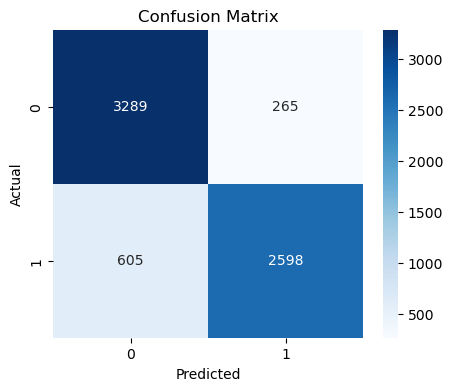

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating and printing the confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix for better visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
import xgboost as xgb

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_clf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.8678407577327216

Confusion Matrix:
[[3331  223]
 [ 670 2533]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3554
           1       0.92      0.79      0.85      3203

    accuracy                           0.87      6757
   macro avg       0.88      0.86      0.87      6757
weighted avg       0.87      0.87      0.87      6757



Confusion Matrix:
[[3289  265]
 [ 605 2598]]


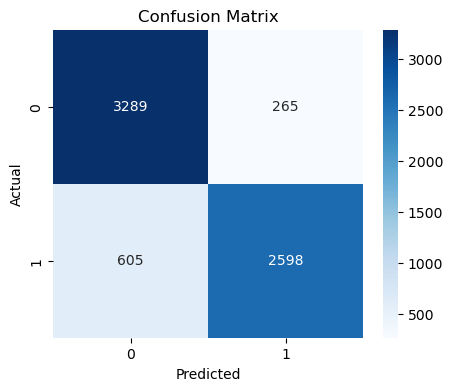

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating and printing the confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix for better visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

# Assuming 'optimized_xgb' is your trained and optimized XGBoost model
model_filename = 'Downloads/rfc.pkl'

# Save the model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(rfc, file)

# Inform the user
print(f"Model saved to {model_filename}")

In [ ]:
from collections import Counter

# Assuming y_test is your target variable
class_counts = Counter(y_test)

print("Counts for each class:")
for class_, count in class_counts.items():
    print(f'Class {class_}: {count}')

In [64]:
from sklearn.model_selection import train_test_split

# Prepare the features (X) and target (y) for modeling
# 'DepDelayMinutes' is assumed to be the target variable
X = df.drop(columns=['DepDelayMinutes', 'DepDel15'])
y = df['DepDelayMinutes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27025, 20), (6757, 20), (27025,), (6757,))

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the decision tree regressor
dt_regressor_sm = DecisionTreeRegressor(random_state=42)
dt_regressor_sm.fit(X_train, y_train)  # Use X_train and y_train for fitting

# Predict on the test set
predictions_test = dt_regressor_sm.predict(X_test)  # Use X_test for predictions

# Calculate evaluation metrics for the test set predictions
mae_smote = mean_absolute_error(y_test, predictions_test)
mse_smote = mean_squared_error(y_test, predictions_test)
rmse_smote = np.sqrt(mse_smote)

In [72]:
mae_smote, mse_smote, rmse_smote

(0.19476098860441024, 0.19476098860441024, 0.4413173332245293)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [73]:
mae, mse, rmse

(0.2052656504365843, 0.10140550540180554, 0.3184423109478474)

In [74]:
from xgboost import XGBRegressor

# Initializing the XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, objective='reg:squarederror')

# Training the model on the training set
xgb_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

# Calculating evaluation metrics for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

(mae_xgb, mse_xgb, rmse_xgb)

(0.23760103496917528, 0.10573312137966777, 0.3251662980378929)

In [75]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Number of gradient boosted trees. Equivalent to the number of boosting rounds
    'max_depth': [3, 6, 9],       # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.1], # Boosting learning rate (xgb’s “eta”)
    'subsample': [0.7, 1],        # Subsample ratio of the training instances (prevents overfitting)
    'colsample_bytree': [0.7, 1], # Subsample ratio of columns when constructing each tree
}

# Initialize the XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV (assuming X_train and y_train are already defined)
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and corresponding RMSE
best_params_xgb = grid_search_xgb.best_params_
best_rmse_xgb = np.sqrt(-grid_search_xgb.best_score_)

print("Best parameters for XGBoost:", best_params_xgb)
print("Best RMSE for XGBoost:", best_rmse_xgb)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 1}
Best RMSE for XGBoost: 0.3199569917377914


In [76]:
# Initialize the XGBRegressor with the best parameters
optimized_xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    subsample=best_params_xgb['subsample'],
    colsample_bytree=best_params_xgb['colsample_bytree']
)

# Fit the optimized model on the training data
optimized_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = optimized_xgb.predict(X_test)

# Calculate evaluation metrics for the optimized model on the test set
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)

# Output the performance metrics
print("Optimized XGBoost Model - Test Set Performance")
print(f"Mean Absolute Error: {mae_optimized}")
print(f"Mean Squared Error: {mse_optimized}")
print(f"Root Mean Squared Error: {rmse_optimized}")

Optimized XGBoost Model - Test Set Performance
Mean Absolute Error: 0.21541805792838725
Mean Squared Error: 0.09940279968307013
Root Mean Squared Error: 0.3152820954051627


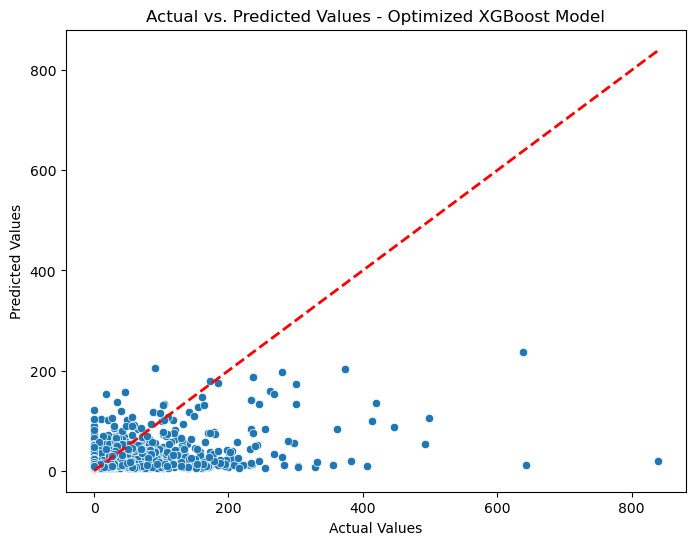

In [94]:
# Creating the plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_optimized)

# Plotting a line for perfect predictions
max_val = max(max(y_test), max(y_pred_optimized))
min_val = min(min(y_test), min(y_pred_optimized))
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--')

# Labeling the axes and the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Optimized XGBoost Model')

# Display the plot
plt.show()

In [80]:
import pickle

# Assuming 'optimized_xgb' is your trained and optimized XGBoost model
model_filename = 'Downloads/smote_xgb_new.pkl'

# Save the model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(optimized_xgb, file)

# Inform the user
print(f"Model saved to {model_filename}")

Model saved to Downloads/smote_xgb_new.pkl


In [79]:
import pickle

# Assuming 'optimized_xgb' is your trained and optimized XGBoost model
model_filename = 'Downloads/rfc_smote.pkl'

# Save the model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(rfc, file)

# Inform the user
print(f"Model saved to {model_filename}")

Model saved to Downloads/rfc_smote.pkl


In [84]:
import pandas as pd
#from sklearn.externals import joblib  # If you're using an older version of scikit-learn; for newer versions, use `from joblib import load`

# Assuming 'X_test' is your dataset prepared for prediction
# Make sure it's preprocessed in the same way as the training data was

# Make predictions
predictions = rfc.predict(X_test)

# Find indices where predictions are '0'
zero_prediction_indices = [index for index, pred in zip(X_test.index, predictions) if pred == 0]

# Print the indices of '0' predictions, their predicted values, and their actual values
for idx in zero_prediction_indices:
    actual_value = y_test.loc[idx]
    print(f"Index: {idx}, Prediction: 0, Actual: {actual_value}")

Index: 1395, Prediction: 0, Actual: 0
Index: 7768, Prediction: 0, Actual: 0
Index: 19780, Prediction: 0, Actual: 0
Index: 5875, Prediction: 0, Actual: 0
Index: 15843, Prediction: 0, Actual: 0
Index: 12348, Prediction: 0, Actual: 0
Index: 11711, Prediction: 0, Actual: 0
Index: 11449, Prediction: 0, Actual: 0
Index: 11740, Prediction: 0, Actual: 0
Index: 8725, Prediction: 0, Actual: 0
Index: 2008, Prediction: 0, Actual: 0
Index: 2903, Prediction: 0, Actual: 0
Index: 16516, Prediction: 0, Actual: 0
Index: 14657, Prediction: 0, Actual: 0
Index: 6224, Prediction: 0, Actual: 0
Index: 1837, Prediction: 0, Actual: 1
Index: 5657, Prediction: 0, Actual: 0
Index: 4985, Prediction: 0, Actual: 0
Index: 16718, Prediction: 0, Actual: 0
Index: 566, Prediction: 0, Actual: 0
Index: 516, Prediction: 0, Actual: 0
Index: 9920, Prediction: 0, Actual: 0
Index: 13617, Prediction: 0, Actual: 0
Index: 10212, Prediction: 0, Actual: 0
Index: 11491, Prediction: 0, Actual: 0
Index: 10115, Prediction: 0, Actual: 0
I

In [86]:
X_test.iloc[1395]

DayofMonth                      13.000000
DayOfWeek                        4.000000
Marketing_Airline_Network        2.000000
DOT_ID_Marketing_Airline     20409.000000
Operating_Airline                3.000000
OriginAirportID              12953.000000
Origin                           1.000000
Dest                             7.000000
DestState                       13.000000
CRSDepTime                    1600.000000
DepTimeBlk                      11.000000
AirTime                         45.000000
Distance                       184.000000
DepCount                        52.000000
Congestion                      69.000000
snow_depth (m)                   0.200000
surface_pressure (hPa)           0.553846
weather_code (wmo code)          0.026667
cloud_cover_mid (%)              0.620000
relative_humidity_2m (%)         0.428571
Name: 18487, dtype: float64

In [93]:
import pickle

# Assuming 'optimized_xgb' is your trained and optimized XGBoost model
model_filename = 'Downloads/xgb_new.pkl'

# Save the model to a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_regressor, file)

# Inform the user
print(f"Model saved to {model_filename}")

Model saved to Downloads/xgb_new.pkl
